main:
ChannelSamples(amp=array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 17., 17., 17., 17

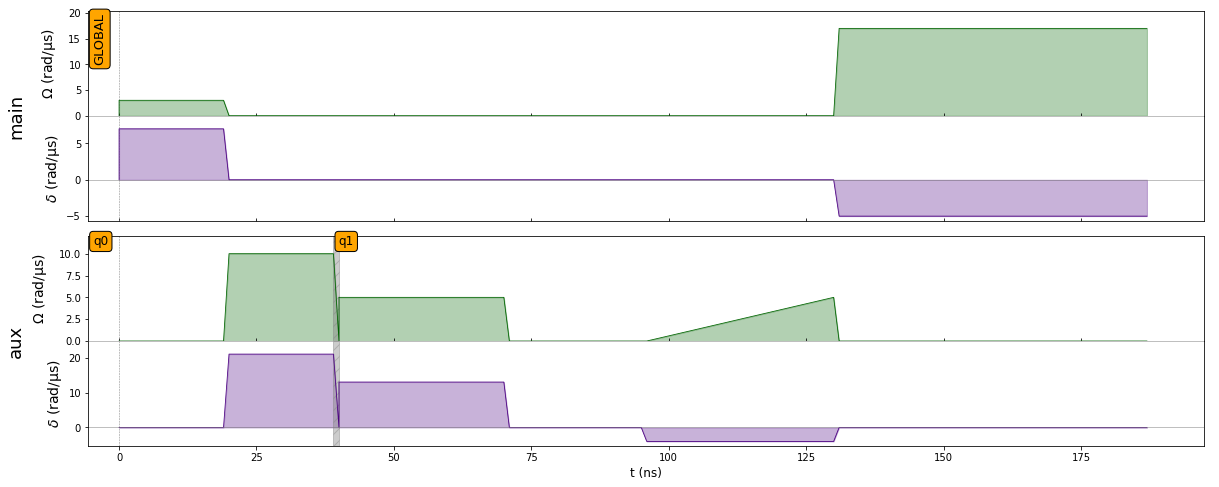

In [1]:
import pulser
from pulser.devices import MockDevice
from pulser.pulse import Pulse
from pulser.sampler import sample
from pulser.waveforms import RampWaveform

reg = pulser.Register.rectangle(1, 2, prefix="q")

seq = pulser.Sequence(reg, MockDevice)
seq.declare_channel("main", "rydberg_global")
seq.declare_channel("aux", "rydberg_local", initial_target="q0")

seq.add(Pulse.ConstantPulse(20, 3, 7, 0), "main")
seq.add(Pulse.ConstantPulse(20, 10, 21, 0), "aux")
seq.target("q1", "aux")
seq.add(Pulse.ConstantPulse(31, 5, 13, 0), "aux")
seq.delay(25, "aux")
seq.add(Pulse.ConstantDetuning(RampWaveform(35, 0, 5), -4, 1), "aux")
seq.add(Pulse.ConstantPulse(57, 17, -5, 0), "main")

samples = sample(seq)
print(samples)
seq.draw()